<a href="https://colab.research.google.com/github/deevijbansal/DSoC-2024/blob/main/DSoC_Week_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           8257        175  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           6481        138  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data      Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          14117        243  1.0              
rabieelkharoua/predict-restaurant-customer-sa

In [ ]:
! kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 86.6MB/s]


In [ ]:
! unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
len(df['Order Date'].unique())

1230

In [ ]:
new_df = df[['Order Date', 'Sales']].copy()

In [ ]:
new_df

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680
...,...,...
9795,21/05/2017,3.7980
9796,12/01/2016,10.3680
9797,12/01/2016,235.1880
9798,12/01/2016,26.3760


In [ ]:
new_df['Order Date'].unique()

array(['08/11/2017', '12/06/2017', '11/10/2016', ..., '18/06/2015',
       '28/02/2018', '09/05/2016'], dtype=object)

In [ ]:
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'], format = '%d/%m/%Y')

In [ ]:
new_df

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-01-12,10.3680
9797,2016-01-12,235.1880
9798,2016-01-12,26.3760


In [ ]:
new_df.sort_values(by='Order Date', inplace = True)
new_df

,Order Date,Sales
7980,2015-01-03,16.448
741,2015-01-04,3.540
740,2015-01-04,272.736
739,2015-01-04,11.784
1759,2015-01-05,19.536
...,...,...
1297,2018-12-30,20.720
906,2018-12-30,323.136
645,2018-12-30,209.300
908,2018-12-30,52.776


In [ ]:
new_df_condensed = new_df.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
new_df_condensed

,Order Date,Sales
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


In [ ]:
new_df_condensed = new_df_condensed.set_index('Order Date')

In [ ]:
new_df_condensed

,Sales
Order Date,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


In [ ]:
import numpy as np
new_df_condensed['Time'] = np.arange(len(new_df_condensed.index))
new_df_condensed

,Sales,Time
Order Date,,
2015-01-03,16.4480,0
2015-01-04,288.0600,1
2015-01-05,19.5360,2
2015-01-06,4407.1000,3
2015-01-07,87.1580,4
...,...,...
2018-12-26,814.5940,1225
2018-12-27,177.6360,1226
2018-12-28,1657.3508,1227


In [ ]:
pd.date_range(start = '2015-01-03', end = '2018-12-30' ).difference(new_df_condensed.index)

DatetimeIndex(['2015-01-08', '2015-01-12', '2015-01-17', '2015-01-21',
               '2015-01-22', '2015-01-24', '2015-01-25', '2015-01-29',
               '2015-02-05', '2015-02-09',
               ...
               '2018-08-02', '2018-08-08', '2018-08-09', '2018-08-30',
               '2018-09-06', '2018-09-27', '2018-10-11', '2018-10-18',
               '2018-10-25', '2018-12-12'],
              dtype='datetime64[ns]', length=228, freq=None)

In [ ]:
all_dates = pd.date_range(start = '2015-01-03', end = '2018-12-30' )
new_df_condensed = new_df_condensed.reindex(all_dates)

In [ ]:
new_df_condensed

,Sales,Time
2015-01-03,16.4480,0.0
2015-01-04,288.0600,1.0
2015-01-05,19.5360,2.0
2015-01-06,4407.1000,3.0
2015-01-07,87.1580,4.0
...,...,...
2018-12-26,814.5940,1225.0
2018-12-27,177.6360,1226.0
2018-12-28,1657.3508,1227.0
2018-12-29,2915.5340,1228.0


In [ ]:
new_df_condensed['Time'] = np.arange(len(new_df_condensed.index))
new_df_condensed

,Sales,Time
2015-01-03,16.4480,0
2015-01-04,288.0600,1
2015-01-05,19.5360,2
2015-01-06,4407.1000,3
2015-01-07,87.1580,4
...,...,...
2018-12-26,814.5940,1453
2018-12-27,177.6360,1454
2018-12-28,1657.3508,1455
2018-12-29,2915.5340,1456


In [ ]:
new_df_condensed['Month'] = new_df_condensed.index.month
new_df_condensed['Year'] = new_df_condensed.index.year
new_df_condensed

,Sales,Time,Month,Year
2015-01-03,16.4480,0,1,2015
2015-01-04,288.0600,1,1,2015
2015-01-05,19.5360,2,1,2015
2015-01-06,4407.1000,3,1,2015
2015-01-07,87.1580,4,1,2015
...,...,...,...,...
2018-12-26,814.5940,1453,12,2018
2018-12-27,177.6360,1454,12,2018
2018-12-28,1657.3508,1455,12,2018
2018-12-29,2915.5340,1456,12,2018


In [ ]:
new_df_condensed = new_df_condensed.iloc[2:]
new_df_condensed

,Sales,Time,Month,Year
2015-01-05,19.5360,2,1,2015
2015-01-06,4407.1000,3,1,2015
2015-01-07,87.1580,4,1,2015
2015-01-08,NaN,5,1,2015
2015-01-09,40.5440,6,1,2015
...,...,...,...,...
2018-12-26,814.5940,1453,12,2018
2018-12-27,177.6360,1454,12,2018
2018-12-28,1657.3508,1455,12,2018
2018-12-29,2915.5340,1456,12,2018


In [ ]:
weekly_sales = new_df_condensed['Sales'].resample('W').sum()
weekly_sales

2015-01-11     4619.1080
2015-01-18     4130.5330
2015-01-25     3092.5440
2015-02-01     2527.9140
2015-02-08      968.5340
                 ...    
2018-12-02    35998.9000
2018-12-09    21537.2410
2018-12-16    11542.8340
2018-12-23    19457.0680
2018-12-30    15210.8858
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [ ]:
display(weekly_sales)

2015-01-11     4619.1080
2015-01-18     4130.5330
2015-01-25     3092.5440
2015-02-01     2527.9140
2015-02-08      968.5340
                 ...    
2018-12-02    35998.9000
2018-12-09    21537.2410
2018-12-16    11542.8340
2018-12-23    19457.0680
2018-12-30    15210.8858
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [ ]:
type(weekly_sales)

pandas.core.series.Series

In [ ]:
week_df = weekly_sales.to_frame()
week_df

,Sales
2015-01-11,4619.1080
2015-01-18,4130.5330
2015-01-25,3092.5440
2015-02-01,2527.9140
2015-02-08,968.5340
...,...
2018-12-02,35998.9000
2018-12-09,21537.2410
2018-12-16,11542.8340
2018-12-23,19457.0680


In [ ]:
week_df['Time'] = np.arange(len(week_df.index))
week_df

,Sales,Time
2015-01-11,4619.1080,0
2015-01-18,4130.5330,1
2015-01-25,3092.5440,2
2015-02-01,2527.9140,3
2015-02-08,968.5340,4
...,...,...
2018-12-02,35998.9000,203
2018-12-09,21537.2410,204
2018-12-16,11542.8340,205
2018-12-23,19457.0680,206


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Training data
X = week_df.loc[:, ['Time']]  # features
y = week_df.loc[:, 'Sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

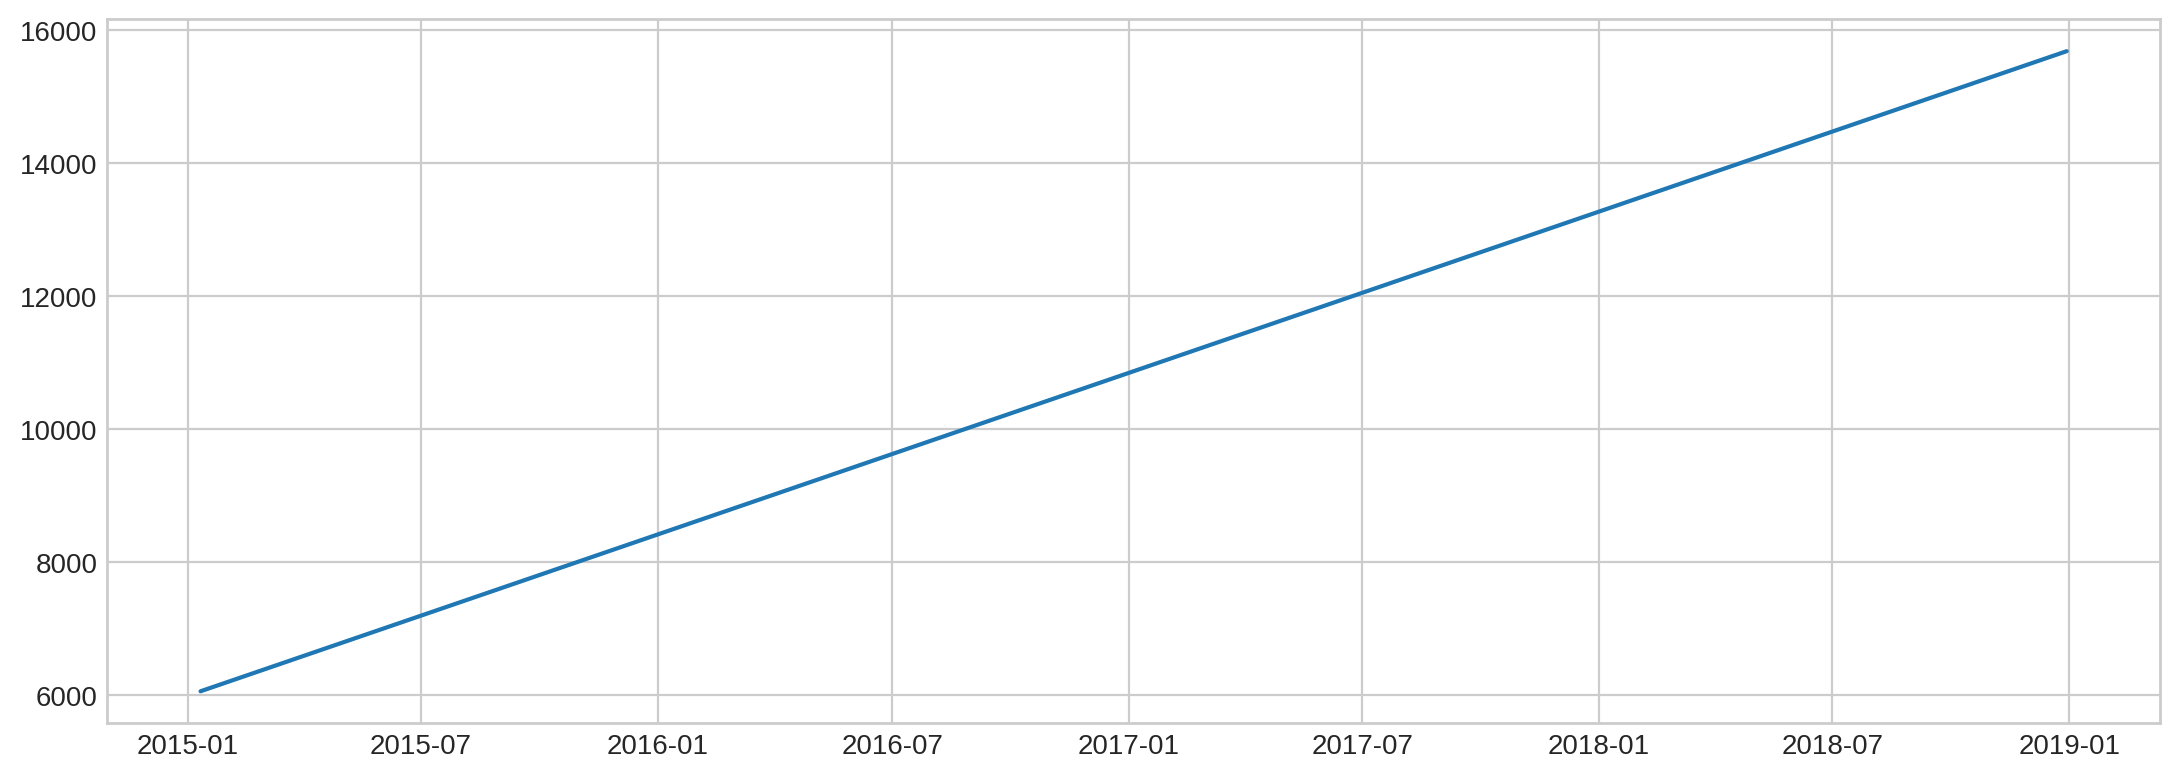

In [ ]:
plt.plot(y_pred)
plt.show()

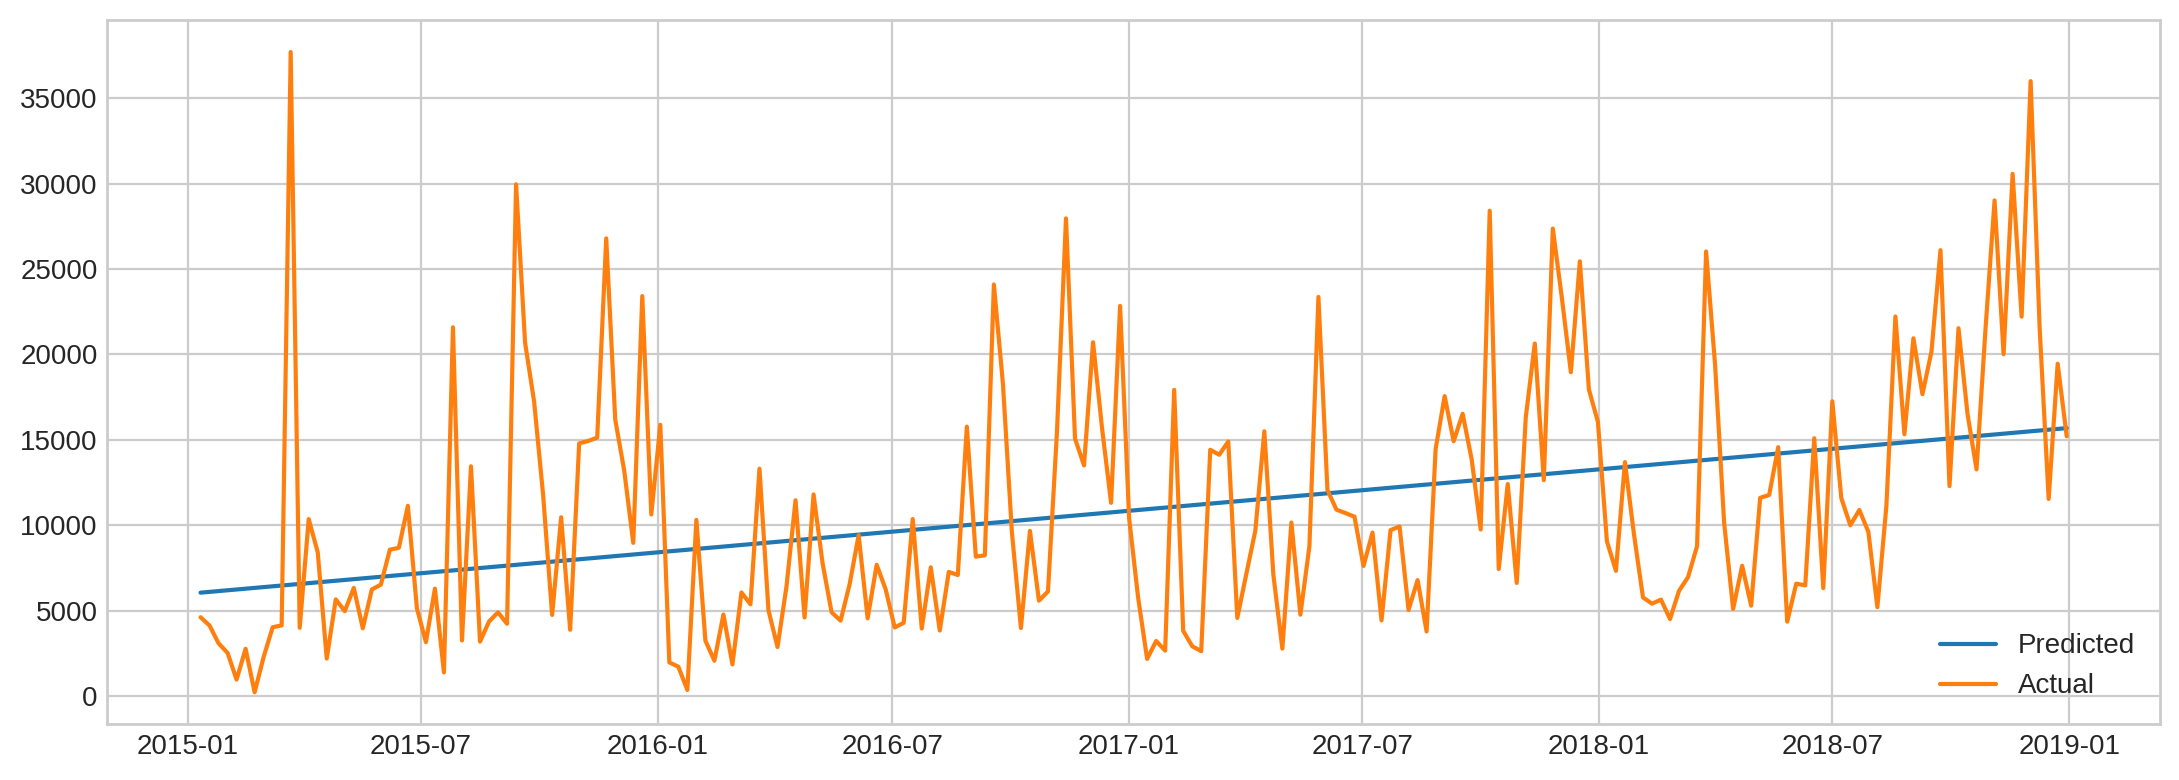

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label = 'Predicted')
plt.plot(y, label = 'Actual')
plt.legend()
plt.show()

In [ ]:
# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 6055.3253927079495
Coefficient: 46.53124270794995
